In [245]:
# 2024년 6월 기준 전국 여행업체 공공 데이터를 기반으로 분석에 필요한 전처리 및 조회, 추출, 시각화 작업을 수행하시오.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. “travel.csv” 파일을 읽어서 데이터프레임 데이터로 변환하여 가져오시오. 데이터프레임 변수는 df로 한다. (배점 :5점)
df = pd.read_csv('travel.csv')
df

,개방자치코드,인허가일자,영업상태코드,상세영업상태,소재지,도로명,사업장명,자본금
0,3000000,2008-03-10,4,등록취소,서울특별시 종로구 통의동 35-89번지 오리온빌딩 2층,"서울특별시 종로구 효자로 7-2 (통의동,오리온빌딩 2층)",(유)더에이치엔에스,38097000
1,3000000,1998-05-12,4,등록취소,서울특별시 종로구 내수동 4-0번지 옥빌딩601호,"서울특별시 종로구 새문안로5가길 11 (내수동,옥빌딩601호)",(주)보딩패스여행사,25243000
2,3000000,1998-08-10,4,등록취소,서울특별시 종로구 신문로1가 25-0번지 용마빌딩401호,NaN,(주)동성에어,4200000
3,3000000,1998-11-21,4,등록취소,서울특별시 종로구 청진동 244-0번지 한백빌딩3층,NaN,에스케이여행사,12044000
4,3000000,1999-03-12,4,등록취소,서울특별시 종로구 당주동 2-2번지,서울특별시 종로구 새문안로5가길 3-1 (당주동),(주)고산자답사회한국여행문화,34454000
...,...,...,...,...,...,...,...,...
16344,6520000,2017-02-02,3,폐업,제주특별자치도 서귀포시 성산읍 2040-1,제주특별자치도 서귀포시 성산읍 서성일로1168번길 89-17,찰쓰투어,12895000
16345,6520000,2012-11-21,3,폐업,제주특별자치도 서귀포시 서호동 1534번지 104동 1303호,"제주특별자치도 서귀포시 서호남로 91, 104동 1303호 (서호동, 서귀포혁신사랑...",(주)예나투어,43952000
16346,6520000,2012-12-21,3,폐업,제주특별자치도 서귀포시 표선면 가시리 3149-33번지,제주특별자치도 서귀포시 표선면 녹산로 381-15,(주)이어도사나,31727000
16347,6520000,2013-04-22,3,폐업,제주특별자치도 서귀포시 서귀동 455-4번지,제주특별자치도 서귀포시 태평로 385 (서귀동),FUN TOUR,33236000


In [246]:
# 2. df 데이터프레임 데이터 자료형 구성을 조회하시오. (배점 :5점)
print(df.dtypes)

개방자치코드     int64
인허가일자     object
영업상태코드     int64
상세영업상태    object
소재지       object
도로명       object
사업장명      object
자본금        int64
dtype: object


In [247]:
# 3. 결측치 값을 조회하시오. (배점 :5점)
df.isnull().sum()

개방자치코드      0
인허가일자       0
영업상태코드      0
상세영업상태      3
소재지         0
도로명       883
사업장명        0
자본금         0
dtype: int64

In [248]:
# 4-1. 중복 데이터 개수를 조회하시오.
df.duplicated().sum()

np.int64(3)

In [249]:
# 4-2. 중복 데이터가 존재하고 있으므로, 중복된 데이터도 조회하시오. (배점 :5점)
df[df.duplicated(keep=False)]

,개방자치코드,인허가일자,영업상태코드,상세영업상태,소재지,도로명,사업장명,자본금
2480,3170000,2010-03-16,1,영업중,서울특별시 금천구 가산동 월드메르디앙1차 1414호,"서울특별시 금천구 벚꽃로 254, 1414호 (가산동, 월드메르디앙1차)",아이빛연구소(주),34591000
2481,3170000,2010-03-16,1,영업중,서울특별시 금천구 가산동 월드메르디앙1차 1414호,"서울특별시 금천구 벚꽃로 254, 1414호 (가산동, 월드메르디앙1차)",아이빛연구소(주),34591000
5007,3330000,2015-07-02,1,영업중,부산광역시 해운대구 좌동 1427-2 부산좌동 창업지원주택,"부산광역시 해운대구 좌동로 166, 101동 1303호 (좌동, 부산좌동 창업지원주택)",요컴퍼니,35043000
5008,3330000,2015-07-02,1,영업중,부산광역시 해운대구 좌동 1427-2 부산좌동 창업지원주택,"부산광역시 해운대구 좌동로 166, 101동 1303호 (좌동, 부산좌동 창업지원주택)",요컴퍼니,35043000
16279,6520000,2016-07-21,1,영업중,제주특별자치도 서귀포시 대포동 760-3번지,제주특별자치도 서귀포시 대포로 26 (대포동),(주)디스커버제주,31754000
16280,6520000,2016-07-21,1,영업중,제주특별자치도 서귀포시 대포동 760-3번지,제주특별자치도 서귀포시 대포로 26 (대포동),(주)디스커버제주,31754000


In [250]:
# 5. 결측치가 있는 ‘상세영업상태’와 ‘도로명’ 열(column)의 결측치를 삭제하시오. (배점 :5점)
df.dropna(subset=['상세영업상태', '도로명'], axis=0, how='any', inplace=True)
df.isnull().sum()

개방자치코드    0
인허가일자     0
영업상태코드    0
상세영업상태    0
소재지       0
도로명       0
사업장명      0
자본금       0
dtype: int64

In [251]:
# 6. 중복 데이터가 있는 데이터는 첫 번째 데이터는 유지하고 삭제하시오.
# ※ 중복 데이터가 성공적으로 삭제되었다면, 다음과 같이 조회되지 않아야 됨 (배점 :5점)
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated(keep=False)]

,개방자치코드,인허가일자,영업상태코드,상세영업상태,소재지,도로명,사업장명,자본금


In [252]:
# 7. ‘도로명’ 열을 삭제하시오. 삭제한 후, '도로명' 열이 삭제되었는지 조회해 보세요. (배점 :5점)
del df['도로명']
print(df.dtypes)

개방자치코드     int64
인허가일자     object
영업상태코드     int64
상세영업상태    object
소재지       object
사업장명      object
자본금        int64
dtype: object


In [253]:
# 8. 열 “자본금” 데이터에 대한 데이터 개수, 평균, 표준편차, 최소값, 25%, 50%, 75, 최대값 통계 값을 출력하시오. (배점 :5점)
pd.options.display.float_format='{:.5f}'.format
print(df['자본금'].describe())

count      15460.00000
mean    22384826.84347
std     12964949.93065
min            0.00000
25%     11248750.00000
50%     22222000.00000
75%     33550750.00000
max     74500000.00000
Name: 자본금, dtype: float64


In [254]:
# 9. ‘상세영업상태’가 “영업중”을 제외하고 모두 삭제하시오. (배점 :5점) 
# ※ 조회하였을 때 ‘상세영업상태’가 “영업중‘만 나와야 함
to_be_deleted = df[df['상세영업상태'] != '영업중'].index
df.drop(to_be_deleted, axis=0, inplace=True)
df

,개방자치코드,인허가일자,영업상태코드,상세영업상태,소재지,사업장명,자본금
130,3000000,2021-06-08,1,영업중,서울특별시 종로구 당주동 145,정다운여행사,6723000
131,3000000,2020-11-17,1,영업중,서울특별시 종로구 혜화동 15-19 선흥그린빌리지 101호,돌레길 협동조합,4830000
132,3000000,2020-11-13,1,영업중,서울특별시 종로구 당주동 145,(주)투어랑,36418000
133,3000000,2021-04-16,1,영업중,서울특별시 종로구 명륜1가 46-3 주호빌딩,다가치포럼 사회적협동조합,10097000
134,3000000,2020-02-27,1,영업중,서울특별시 종로구 수송동 58 두산위브파빌리온,주식회사 월드미소투어,26360000
...,...,...,...,...,...,...,...
16279,6520000,2016-07-21,1,영업중,제주특별자치도 서귀포시 대포동 760-3번지,(주)디스커버제주,31754000
16281,6520000,2016-08-09,1,영업중,제주특별자치도 서귀포시 서홍동 446-5번지,(주)오이오이,3632000
16282,6520000,2010-11-17,1,영업중,제주특별자치도 서귀포시 서홍동 349-8 제1호,투어리스 여행사,10151000
16283,6520000,2001-01-19,1,영업중,제주특별자치도 서귀포시 호근동 1822-5번지,제주도여행사,23764000


In [255]:
# 10. 자본금이 30,000,000원 미만인 데이터를 32,000,000원으로 대체하여 적용하시오.
# ※ 32,000,000원으로 적용되었으므로 30,000,000 미만인 데이터가 모두 32,000,000으로 대체 되어 조회되어야 함 (배점 :5점)
df.loc[df['자본금'] < 30000000, '자본금'] = 32000000
df
# df[df['자본금'] < 30000000]

,개방자치코드,인허가일자,영업상태코드,상세영업상태,소재지,사업장명,자본금
130,3000000,2021-06-08,1,영업중,서울특별시 종로구 당주동 145,정다운여행사,32000000
131,3000000,2020-11-17,1,영업중,서울특별시 종로구 혜화동 15-19 선흥그린빌리지 101호,돌레길 협동조합,32000000
132,3000000,2020-11-13,1,영업중,서울특별시 종로구 당주동 145,(주)투어랑,36418000
133,3000000,2021-04-16,1,영업중,서울특별시 종로구 명륜1가 46-3 주호빌딩,다가치포럼 사회적협동조합,32000000
134,3000000,2020-02-27,1,영업중,서울특별시 종로구 수송동 58 두산위브파빌리온,주식회사 월드미소투어,32000000
...,...,...,...,...,...,...,...
16279,6520000,2016-07-21,1,영업중,제주특별자치도 서귀포시 대포동 760-3번지,(주)디스커버제주,31754000
16281,6520000,2016-08-09,1,영업중,제주특별자치도 서귀포시 서홍동 446-5번지,(주)오이오이,32000000
16282,6520000,2010-11-17,1,영업중,제주특별자치도 서귀포시 서홍동 349-8 제1호,투어리스 여행사,32000000
16283,6520000,2001-01-19,1,영업중,제주특별자치도 서귀포시 호근동 1822-5번지,제주도여행사,32000000


In [256]:
# 11. ‘인허가일자’에서 연도를 추출하여 ‘개점년도’ 열을 추가하시오. (배점 :10점)
# 1) 현재 “인허가일자”는 문자형태의 object 타입인데 날짜형 데이터로 변환하기 위해서는 pd.to_datetime() 함수를 적용하면 날짜 형태 자료형인 datetime 으로 변환이 가능하다.
# 2) 변환된 날짜 데이터에서 년도만 추출하기 위해서는 df[‘인허가일자’].dt.year 명령을 이용한 다.(주의! 연도는 dt.year이다.)
df['인허가일자'] = pd.to_datetime(df['인허가일자'])
df['개점년도'] = df['인허가일자'].dt.year
df

,개방자치코드,인허가일자,영업상태코드,상세영업상태,소재지,사업장명,자본금,개점년도
130,3000000,2021-06-08,1,영업중,서울특별시 종로구 당주동 145,정다운여행사,32000000,2021
131,3000000,2020-11-17,1,영업중,서울특별시 종로구 혜화동 15-19 선흥그린빌리지 101호,돌레길 협동조합,32000000,2020
132,3000000,2020-11-13,1,영업중,서울특별시 종로구 당주동 145,(주)투어랑,36418000,2020
133,3000000,2021-04-16,1,영업중,서울특별시 종로구 명륜1가 46-3 주호빌딩,다가치포럼 사회적협동조합,32000000,2021
134,3000000,2020-02-27,1,영업중,서울특별시 종로구 수송동 58 두산위브파빌리온,주식회사 월드미소투어,32000000,2020
...,...,...,...,...,...,...,...,...
16279,6520000,2016-07-21,1,영업중,제주특별자치도 서귀포시 대포동 760-3번지,(주)디스커버제주,31754000,2016
16281,6520000,2016-08-09,1,영업중,제주특별자치도 서귀포시 서홍동 446-5번지,(주)오이오이,32000000,2016
16282,6520000,2010-11-17,1,영업중,제주특별자치도 서귀포시 서홍동 349-8 제1호,투어리스 여행사,32000000,2010
16283,6520000,2001-01-19,1,영업중,제주특별자치도 서귀포시 호근동 1822-5번지,제주도여행사,32000000,2001


In [257]:
# 12. “개점년도”를 기준으로 그룹화하여, 사업장 개수, 년도별 자본금 합계를 구하시오. 이때 그룹화한 데이터를 새로운 변수에 저장하시오. (배점 :10점)

# 풀이1
# 그룹화 진행시 as_index=False를 주지 않으면 컬럼명 '개점년도'로 부를 수가 없다.
df_group = df.groupby(['개점년도'], as_index=False).agg({'사업장명': 'count', '자본금': 'sum'})
df_group

# 풀이2
# pivot_table로 하더라도 index를 개점년도로 주면 아래에서 컬럼명 '개점년도'로 부를 수가 없다.
# df_group = df.pivot_table(index=['개점년도'], values=['사업장명', '자본금'], aggfunc={'사업장명': 'count', '자본금': 'sum'})
# df_group

,개점년도,사업장명,자본금
0,1971,1,32000000
1,1972,1,31282000
2,1982,1,30566000
3,1983,3,98045000
4,1984,2,76018000
5,1986,4,144877000
6,1987,5,176718000
7,1988,6,198819000
8,1989,3,102082000
9,1990,1,32000000


In [258]:
# 13. 그룹한 데이터에서 ‘사업장명’을 ‘년도별사업장개수“로 이름을 변경하세요. (배점 :5점)
df_group = df_group.rename(columns={'사업장명': '년도별사업장개수'})
df_group

,개점년도,년도별사업장개수,자본금
0,1971,1,32000000
1,1972,1,31282000
2,1982,1,30566000
3,1983,3,98045000
4,1984,2,76018000
5,1986,4,144877000
6,1987,5,176718000
7,1988,6,198819000
8,1989,3,102082000
9,1990,1,32000000


In [259]:
# 14. 그룹한 데이터에서 “년도별사업장개수”가 높은 년도를 기준으로 ‘순위’ 열을 추가하시오. 그 다음 사업장개수가 높은 순으로 출력하시오. (배점 :5점)
df_group['순위'] = df_group['년도별사업장개수'].rank(method='dense', ascending=False).astype(int)
df_group = df_group.sort_values(by='순위', ascending=True)
df_group

,개점년도,년도별사업장개수,자본금,순위
38,2019,267,8960112000,1
37,2018,232,7879218000,2
34,2015,223,7467657000,3
39,2020,214,7200691000,4
40,2021,203,6855779000,5
36,2017,194,6566727000,6
42,2023,188,6392128000,7
35,2016,177,5947425000,8
41,2022,169,5723777000,9
32,2013,165,5507895000,10


In [260]:
# 15. 2019~2023년 사이 “개점년도”, “년도별사업장개수”, “자본금”, “순위” 데이터를 추출하여 새로운 변수 branch_rank에 저장하시오. (배점 :5점)
# 풀이1 (내꺼)
# 그룹화 진행시 as_index=False를 주지 않으면 컬럼명으로 부를수가 없다.
branch_rank = df_group[(df_group['개점년도'] >= 2019) & (df_group['개점년도'] <= 2023)]
branch_rank
# 풀이2 (강사님꺼)
# branch_rank = df_group.query('2019 <= 개점년도 <= 2023')
# branch_rank

,개점년도,년도별사업장개수,자본금,순위
38,2019,267,8960112000,1
39,2020,214,7200691000,4
40,2021,203,6855779000,5
42,2023,188,6392128000,7
41,2022,169,5723777000,9


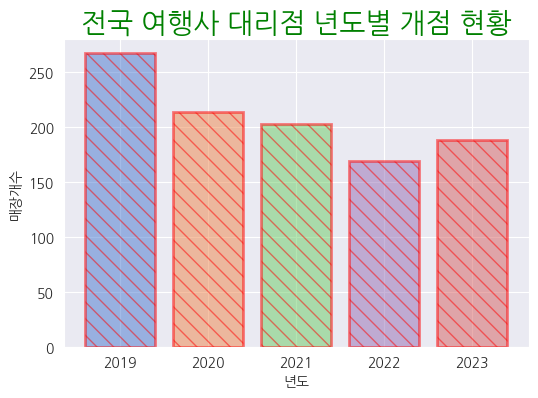

In [261]:
# 16. “branch_rank”에 저장된 변수에서, x축은 “개점년도”, y축은 “년도별사업장개수”를 데이터로 활용하여 세로막대 그래프를 표시하는 시각화를 진행하시오. (배점 :10점)
# 그룹화 진행시 as_index=False를 주지 않으면 컬럼명으로 부를수가 없다. list의 형태로 따로 제공해야함. ex) [2019,2020,...2023]
label = branch_rank['개점년도']
data = branch_rank['년도별사업장개수']

plt.rcParams['font.family'] = 'nanum gothic'
plt.figure(figsize=(6, 4))
colors = sns.color_palette('muted', n_colors=len(label))
plt.bar(label, data, color=colors, width=0.8, align='center', alpha=0.5, linewidth=2, edgecolor='red', hatch='\\\\')
plt.title('전국 여행사 대리점 년도별 개점 현황', fontsize=20, fontweight='bold', color='green')
plt.xlabel('년도')
plt.ylabel('매장개수')
plt.show()

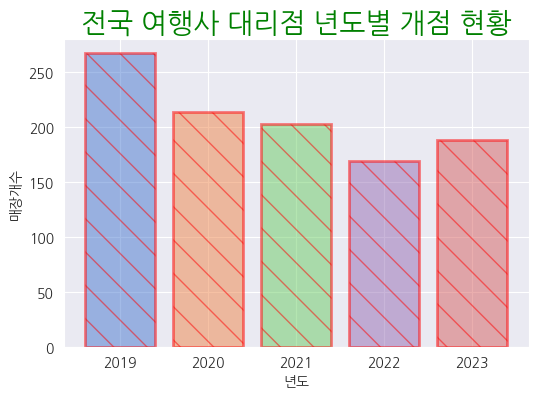

In [262]:
plt.rcParams['font.family'] = 'nanum gothic'
plt.figure(figsize=(6, 4))
colors = sns.color_palette('muted', n_colors=len(label))
plt.bar(label, data, color=colors, width=0.8, align='center', alpha=0.5, linewidth=2, edgecolor='red', hatch='\\')
plt.title('전국 여행사 대리점 년도별 개점 현황', fontsize=20, fontweight='bold', color='green')
plt.xlabel('년도')
plt.ylabel('매장개수')
plt.savefig('travel.png')